<a href="https://colab.research.google.com/github/ujwalvk/Barcode-Detector/blob/main/Train_YOLO_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Mar  6 08:14:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#1.&nbsp;Gather and Label Training Images

# 2.&nbsp;Upload Image Dataset and Prepare Training Data

## 2.1 Upload images

First, we need to upload the dataset to Colab. Here are a few options for moving the `data.zip` folder into this Colab instance.

**Option 1. Upload through Google Colab**

Upload the `data.zip` file to the Google Colab instance by clicking the "Files" icon on the left hand side of the browser, and then the "Upload to session storage" icon. Select the zip folder to upload it.

<p>
<br>
<img src="https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/doc/upload-colab-files.png" height="240">
</p>


## 2.2 Split images into train and validation folders

At this point, whether you used Option 1, 2, or 3, you should be able to click the folder icon on the left and see your `data.zip` file in the list of files. Next, we'll unzip `data.zip` and create some folders to hold the images. Run the following code block to unzip the data.

In [2]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

Ultralytics requires a particular folder structure to store training data for models. Ultralytics requires a particular folder structure to store training data for models. The root folder is named “data”. Inside, there are two main folders:

*   **Train**: These are the actual images used to train the model. In one epoch of training, every image in the train set is passed into the neural network. The training algorithm adjusts the network weights to fit the data in the images.


*   **Validation**: These images are used to check the model's performance at the end of each training epoch.

In each of these folders is a “images” folder and a “labels” folder, which hold the image files and annotation files respectively.


I wrote a Python script that will automatically create the required folder structure and randomly move 90% of dataset to the "train" folder and 10% to the "validation" folder. Run the following code block to download and execute the scrpt.

In [3]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-03-06 08:21:45--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-03-06 08:21:45 (48.9 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 37
Number of annotation files: 37
Images moving to train: 33
Images moving to validation: 4


# 3.&nbsp;Install Requirements (Ultralytics)

Next, we'll install the Ultralytics library in this Google Colab instance. This Python library will be used to train the YOLO model.

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# 4.&nbsp;Configure Training


There's one last step before we can run training: we need to create the Ultralytics training configuration YAML file. This file specifies the location of your train and validation data, and it also defines the model's classes. An example configuration file model is available [here](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco128.yaml).

Run the code block below to automatically generate a `data.yaml` configuration file. Make sure you have a labelmap file located at `custom_data/classes.txt`. If you used Label Studio or one of my pre-made datasets, it should already be present. If you assembled the dataset another way, you may have to manually create the `classes.txt` file (see [here](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/doc/classes.txt) for an example of how it's formatted).

In [5]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 1
names:
- Barcode


# 5.&nbsp;Train Model

## 5.2 Run Training!

In [6]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=80 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 162MB/s]
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fal

#6.&nbsp;Test Model

In [37]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/4 /content/data/validation/images/4a59c82b-img_44.jpg: 640x480 1 Barcode, 44.3ms
image 2/4 /content/data/validation/images/7875bfb0-4.png: 640x480 1 Barcode, 12.1ms
image 3/4 /content/data/validation/images/97d0a5d9-3.png: 640x480 1 Barcode, 12.0ms
image 4/4 /content/data/validation/images/ce0d42b9-img_47.jpg: 640x480 1 Barcode, 12.1ms
Speed: 3.1ms preprocess, 20.1ms inference, 42.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 /content/runs/detect/predict/ce0d42b9-img_47.jpg: 640x480 (no detections), 12.8ms
Speed: 3.2ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


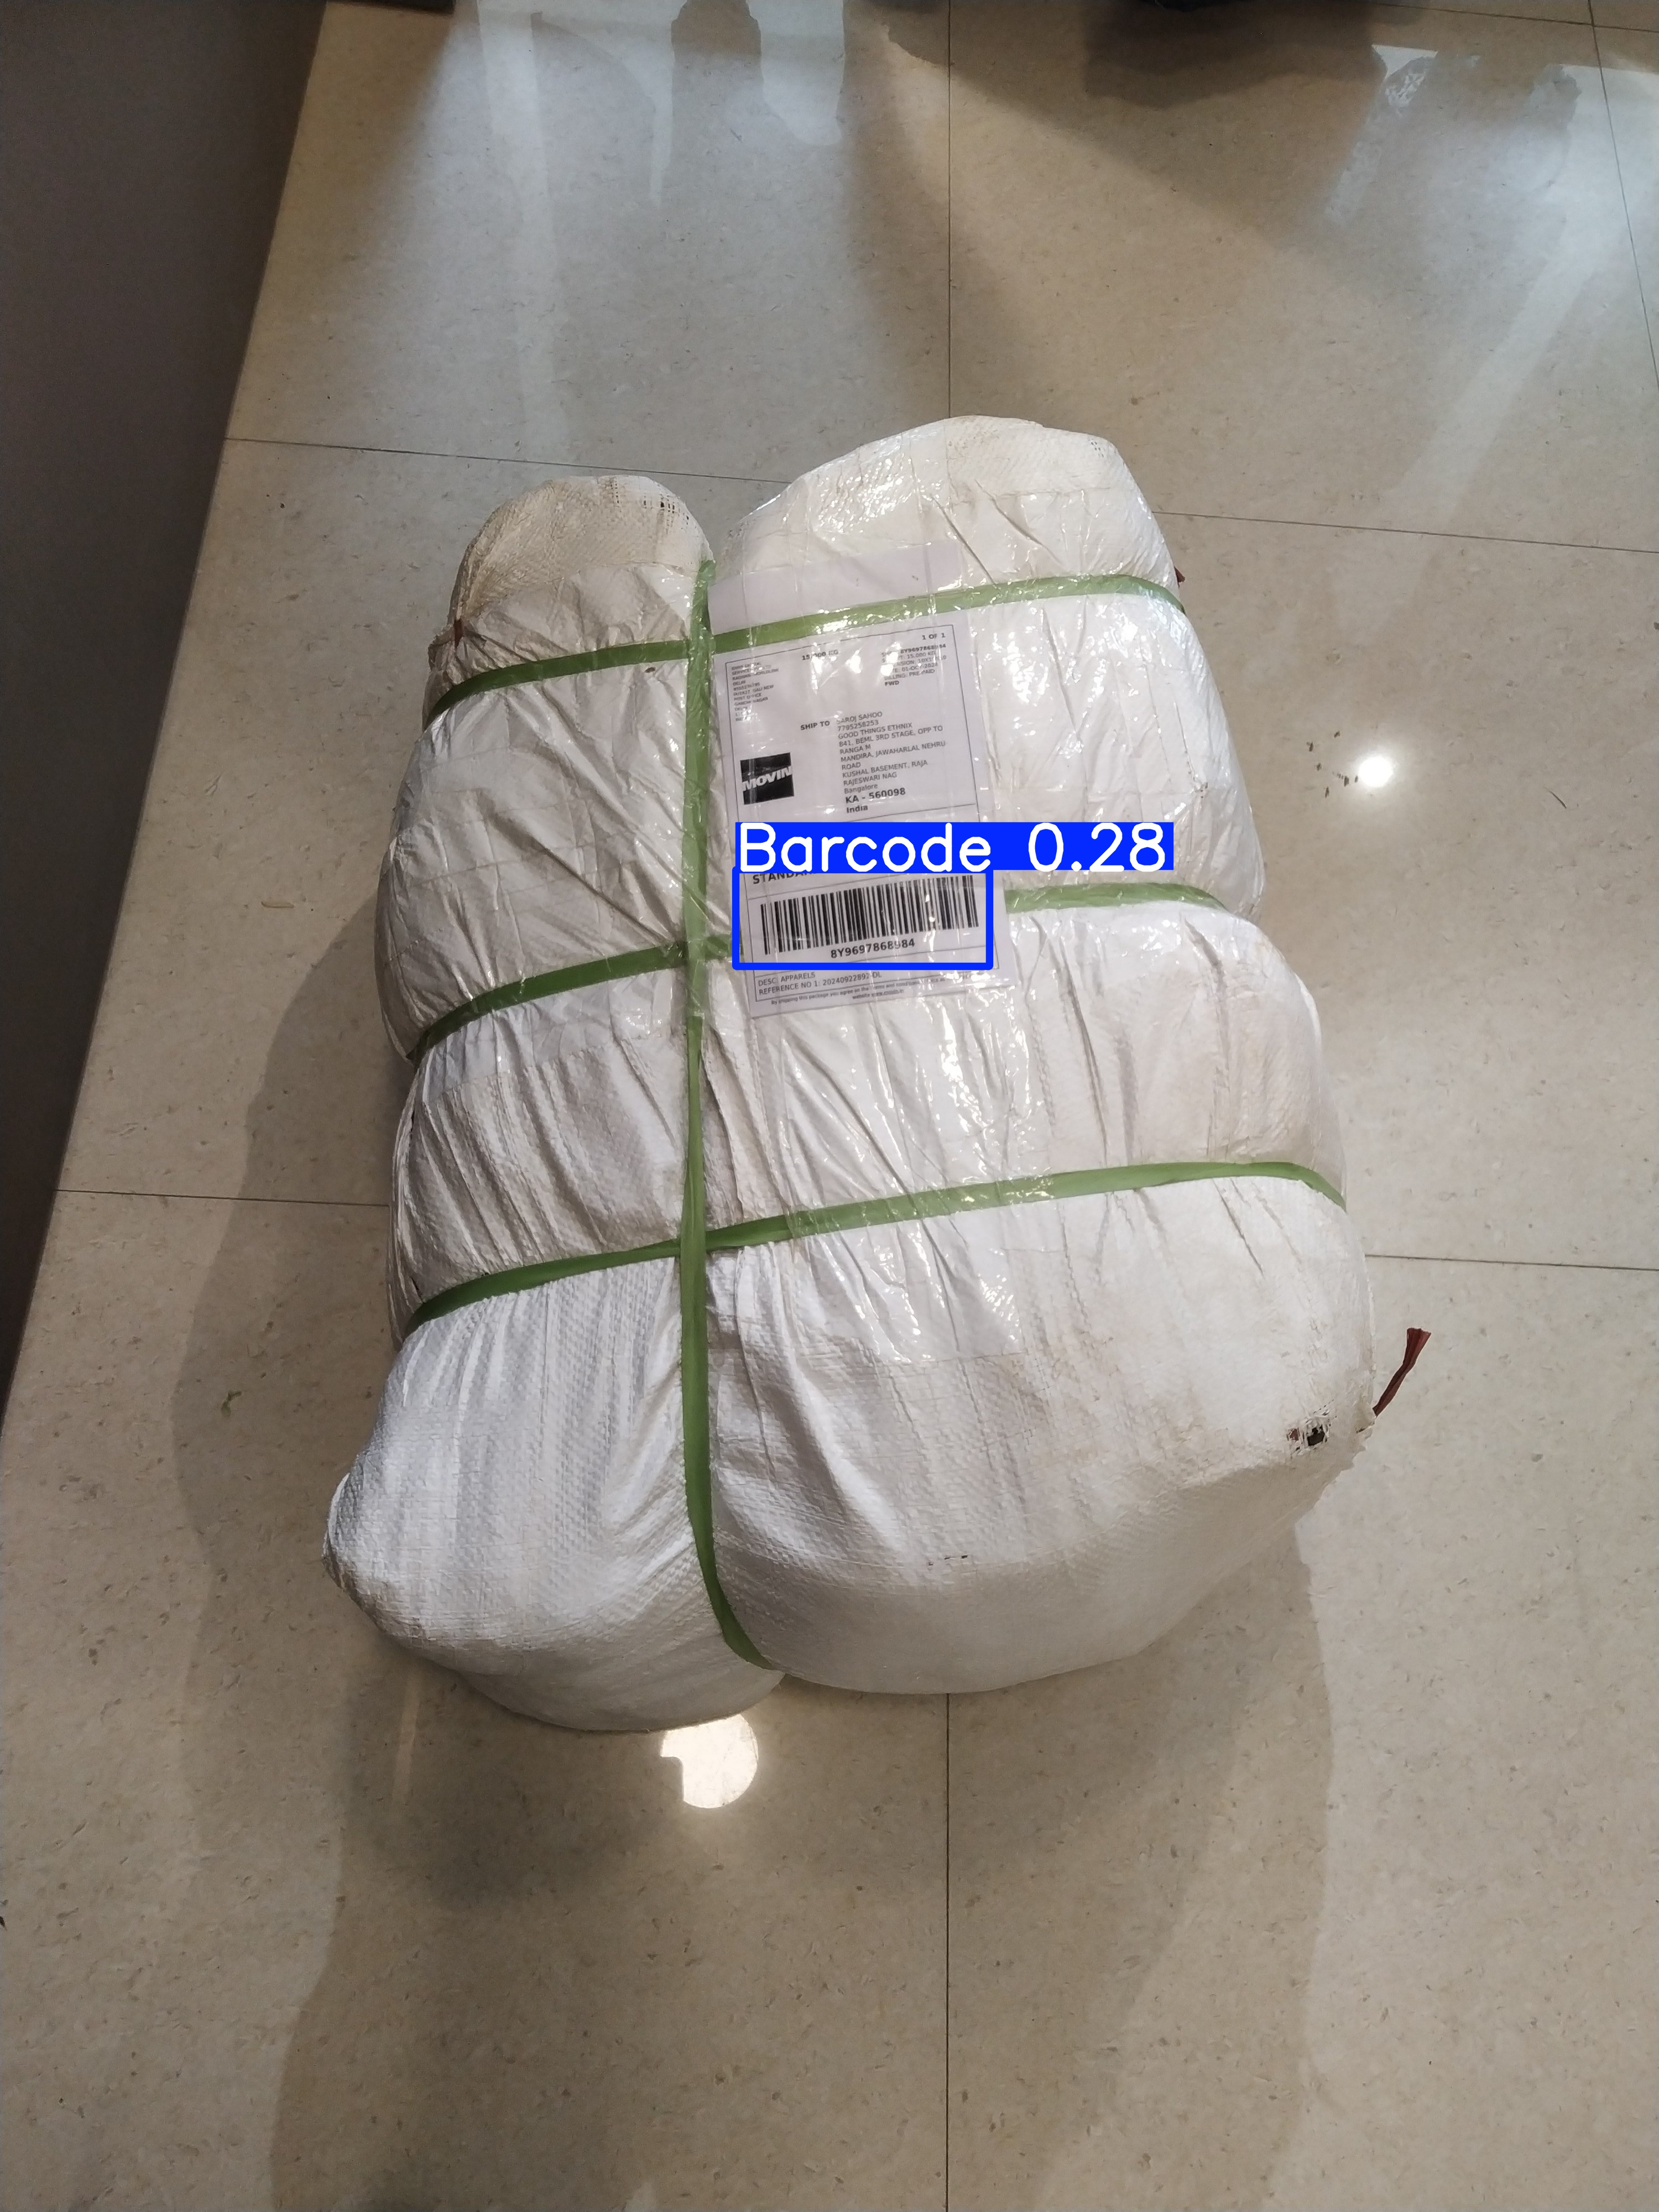

Image: /content/runs/detect/predict/ce0d42b9-img_47.jpg



image 1/1 /content/runs/detect/predict/4a59c82b-img_44.jpg: 640x480 1 Barcode, 12.2ms
Speed: 4.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


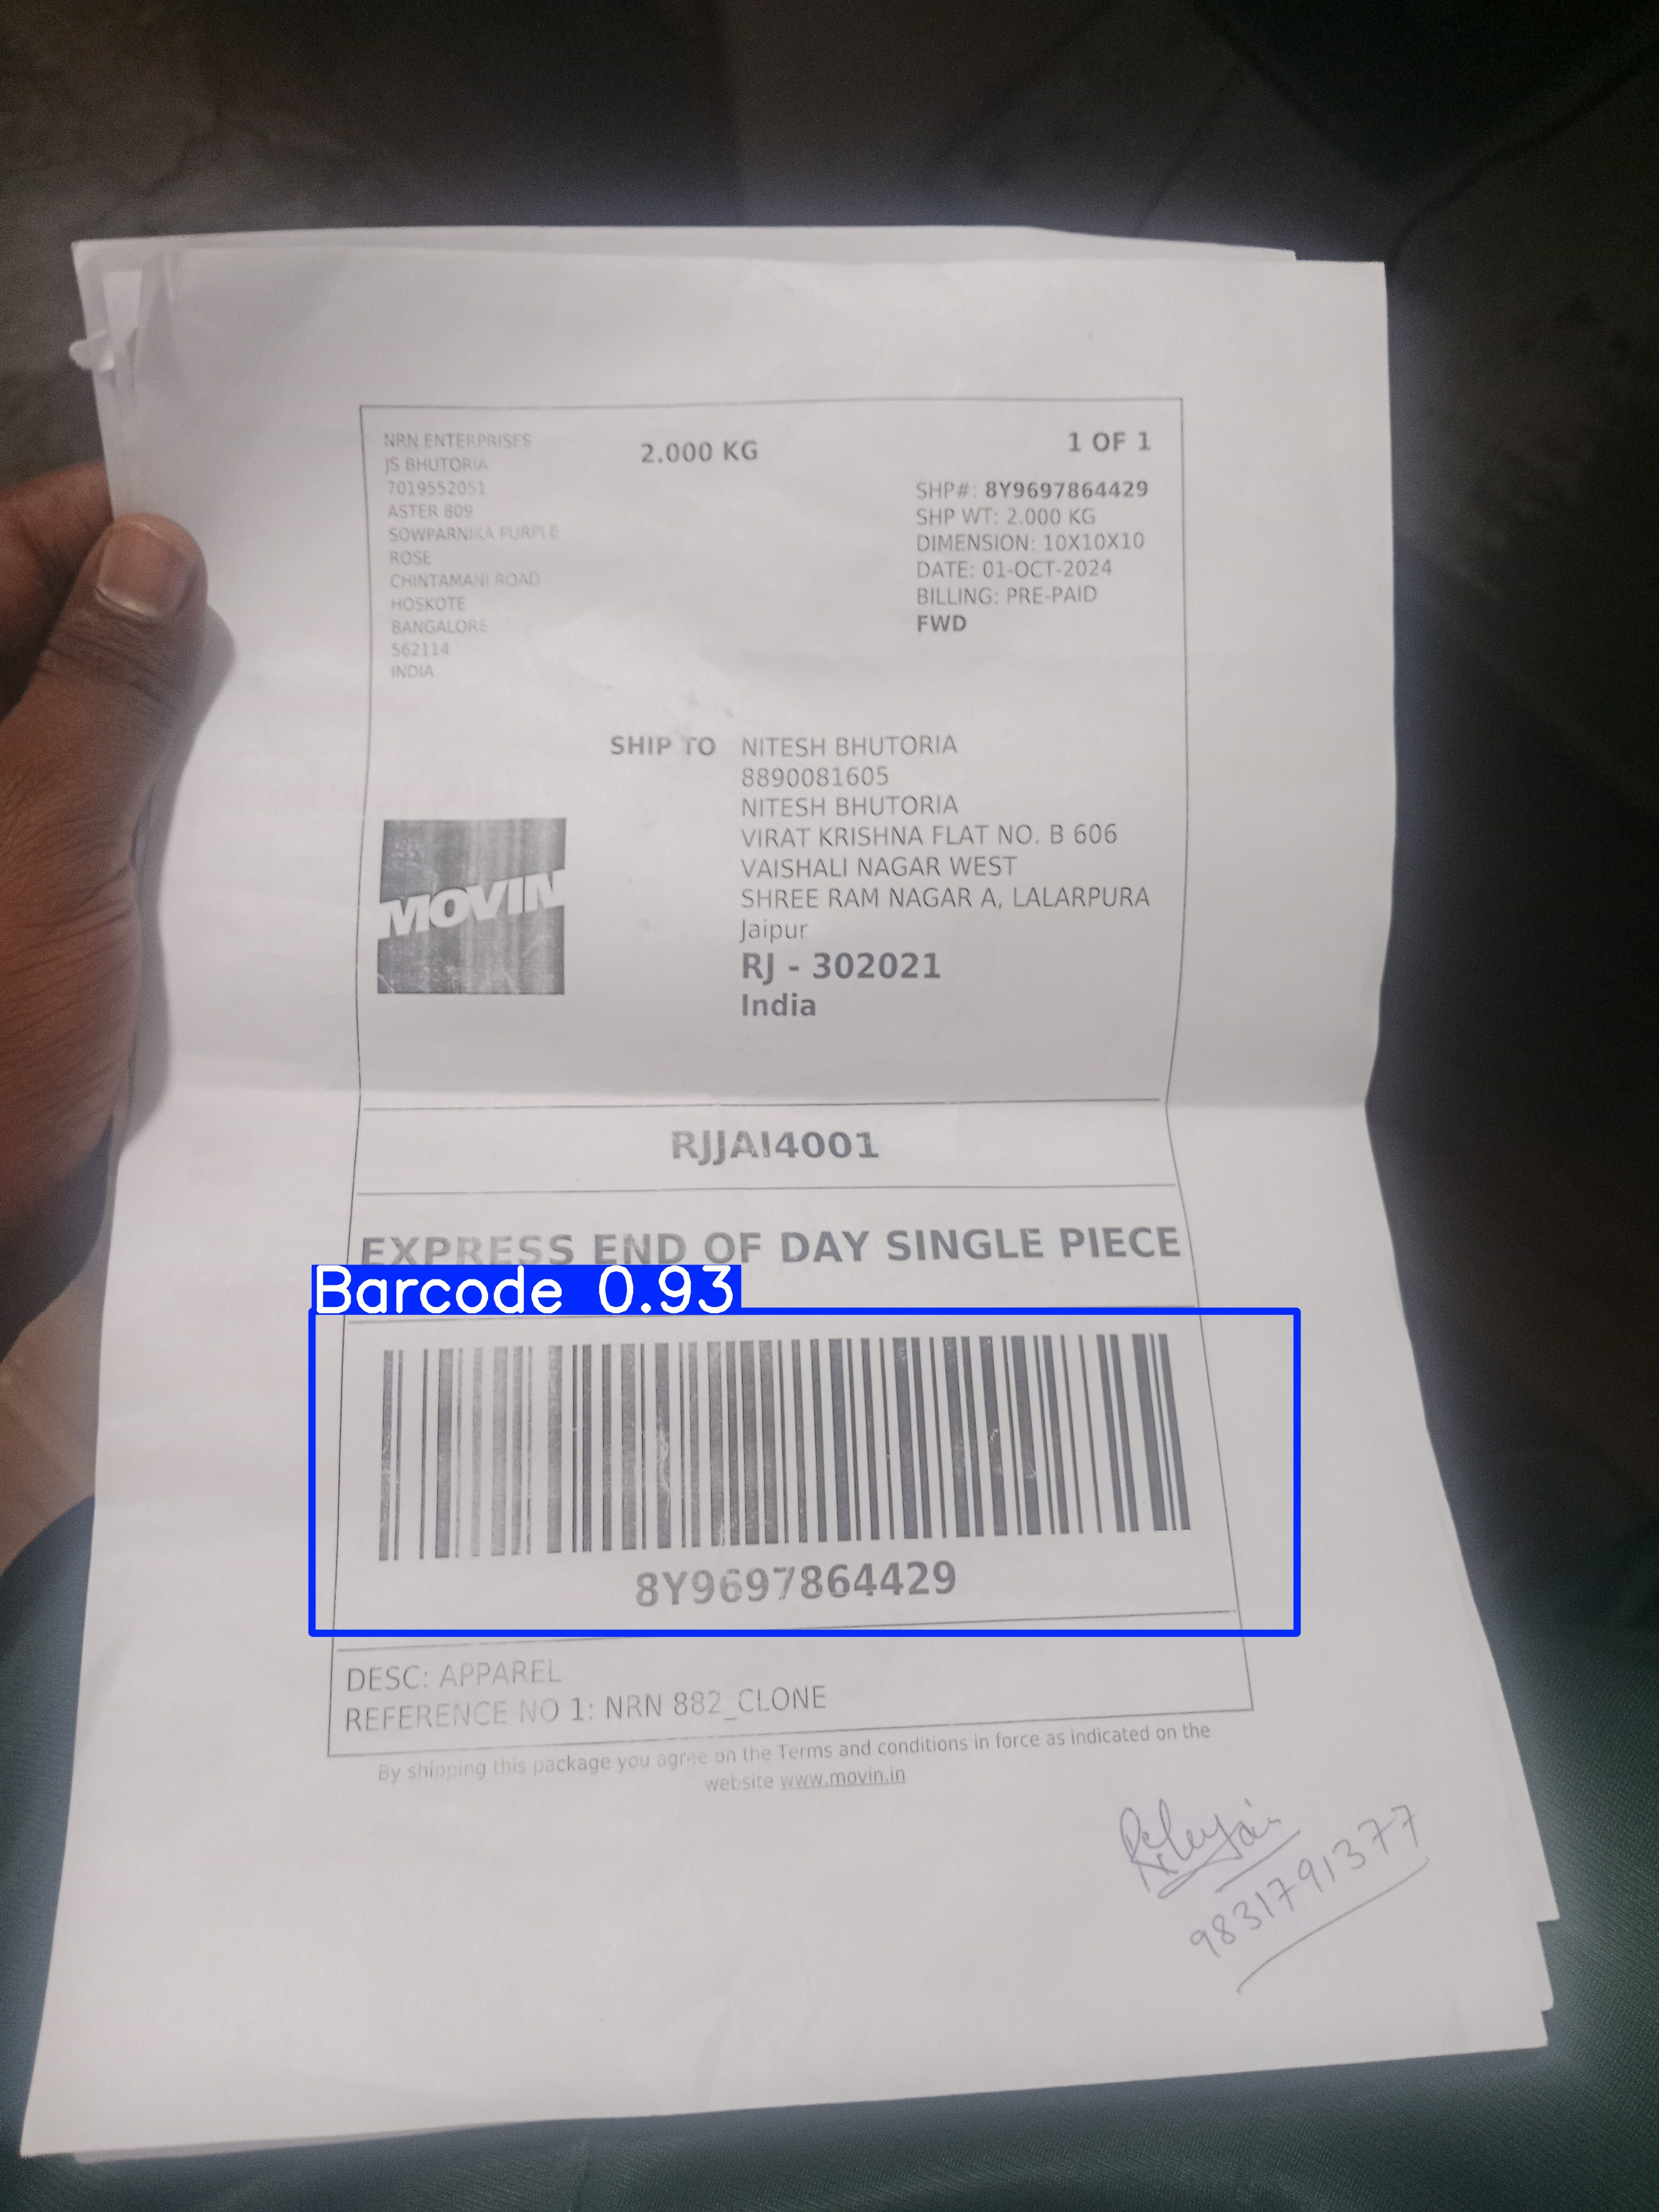

Image: /content/runs/detect/predict/4a59c82b-img_44.jpg
Upper Left: (667, 2426), Upper Right: (2304, 2426), Lower Left: (667, 2969), Lower Right: (2304, 2969)



image 1/1 /content/runs/detect/predict/7875bfb0-4.jpg: 640x480 1 Barcode, 28.0ms
Speed: 15.4ms preprocess, 28.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 480)


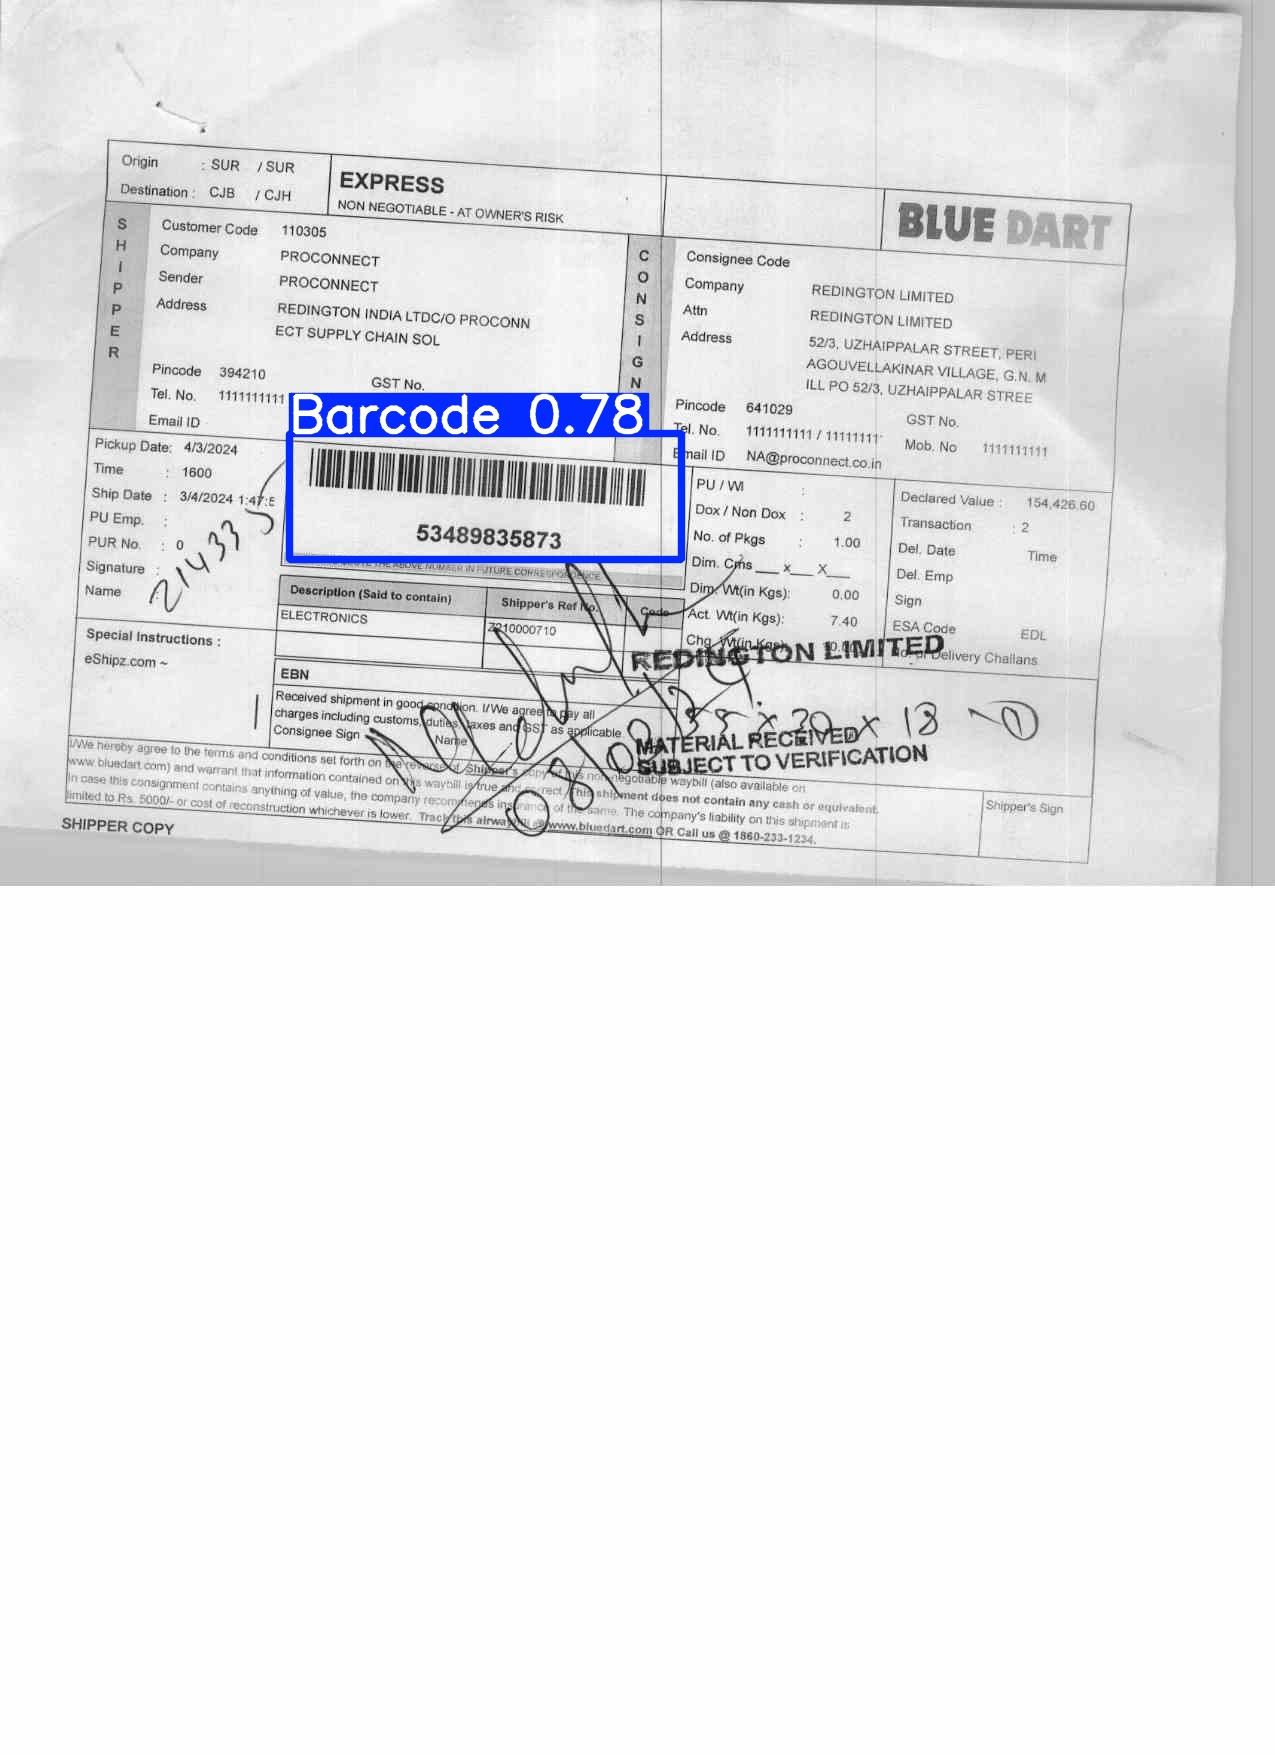

Image: /content/runs/detect/predict/7875bfb0-4.jpg
Upper Left: (293, 438), Upper Right: (665, 438), Lower Left: (293, 552), Lower Right: (665, 552)



image 1/1 /content/runs/detect/predict/97d0a5d9-3.jpg: 640x480 1 Barcode, 32.7ms
Speed: 9.1ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


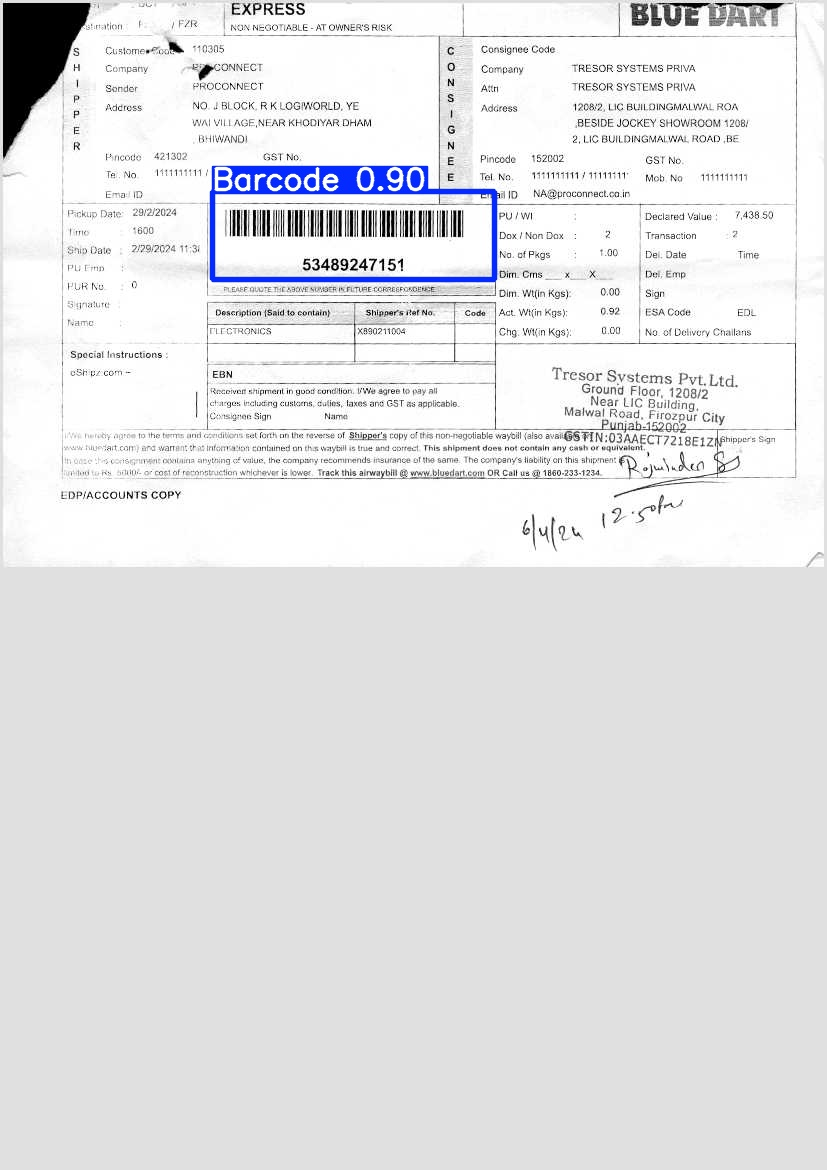

Image: /content/runs/detect/predict/97d0a5d9-3.jpg
Upper Left: (222, 192), Upper Right: (484, 192), Lower Left: (222, 275), Lower Right: (484, 275)




In [38]:
import glob
import cv2
import torch
from IPython.display import Image, display
from ultralytics import YOLO

# Load your trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
    results = model(image_path)  # Run inference

    # Display the image
    display(Image(filename=image_path, height=400))

    # Extract and print bounding box coordinates
    print(f"Image: {image_path}")
    for result in results:
        for box in result.boxes.xyxy:  # YOLO outputs (x1, y1, x2, y2)
            x1, y1, x2, y2 = map(int, box.tolist())
            print(f"Upper Left: ({x1}, {y1}), Upper Right: ({x2}, {y1}), "
                  f"Lower Left: ({x1}, {y2}), Lower Right: ({x2}, {y2})")
    print("\n")




image 1/1 /content/runs/detect/predict/ce0d42b9-img_47.jpg: 640x480 (no detections), 12.9ms
Speed: 3.4ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


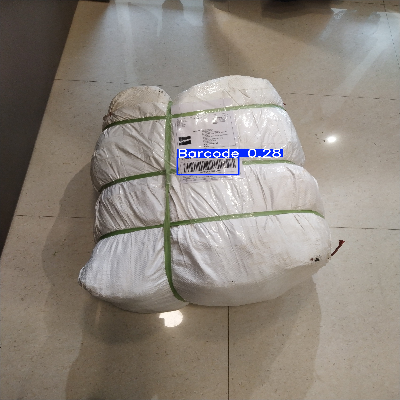




image 1/1 /content/runs/detect/predict/4a59c82b-img_44.jpg: 640x480 1 Barcode, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Image: /content/runs/detect/predict/4a59c82b-img_44.jpg
Upper Left: (667, 2426), Upper Right: (2304, 2426), Lower Left: (667, 2969), Lower Right: (2304, 2969)


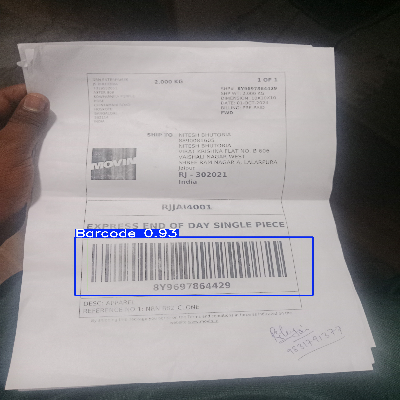




image 1/1 /content/runs/detect/predict/7875bfb0-4.jpg: 640x480 1 Barcode, 12.1ms
Speed: 4.6ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Image: /content/runs/detect/predict/7875bfb0-4.jpg
Upper Left: (293, 438), Upper Right: (665, 438), Lower Left: (293, 552), Lower Right: (665, 552)


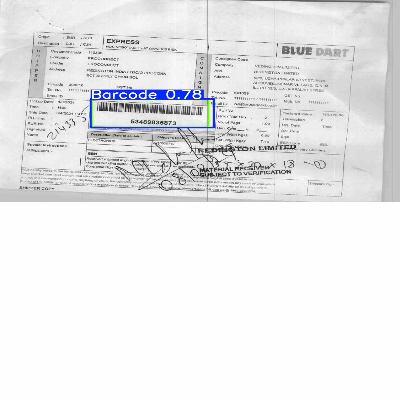




image 1/1 /content/runs/detect/predict/97d0a5d9-3.jpg: 640x480 1 Barcode, 21.3ms
Speed: 8.5ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Image: /content/runs/detect/predict/97d0a5d9-3.jpg
Upper Left: (222, 192), Upper Right: (484, 192), Lower Left: (222, 275), Lower Right: (484, 275)


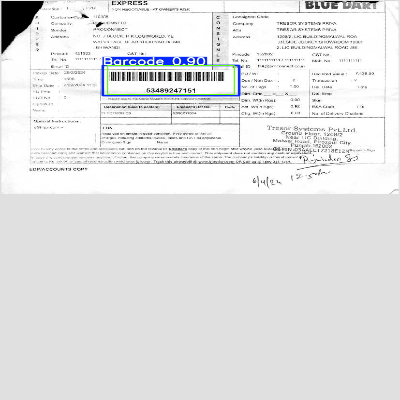

In [42]:
import cv2
import glob
import torch
from ultralytics import YOLO
from IPython.display import display
from PIL import Image as PILImage

# Load YOLO model
model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed

# Process images in the predicted folder
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
    img = cv2.imread(image_path)  # Load image
    results = model(image_path)  # Run inference

    # Extract and draw bounding boxes
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box.tolist())
            print(f"Image: {image_path}")
            print(f"Upper Left: ({x1}, {y1}), Upper Right: ({x2}, {y1}), "
                  f"Lower Left: ({x1}, {y2}), Lower Right: ({x2}, {y2})")

            # Draw rectangle on image
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 100) , 2)  # Green box

    # Resize image to reduce display size
    img = cv2.resize(img, (400, 400))  # Adjust size as needed

    # Convert BGR to RGB (for correct display in Colab)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = PILImage.fromarray(img)

    # Display resized image with bounding boxes
    display(pil_img)
    print("\n")


In [40]:
    img_height, img_width, _ = img.shape
    print(f"Image Size: {img_width}x{img_height}")
    print(f"Box Width: {x2-x1}, Box Height: {y2-y1}")


Image Size: 827x1170
Box Width: 262, Box Height: 83


#7.&nbsp;Deploy Model

In [52]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model2
!cp /content/runs/detect/train/weights/best.pt /content/my_model2/my_model2.pt
!cp -r /content/runs/detect/train /content/my_model2

# Zip into "my_model.zip"
%cd my_model2
!zip /content/my_model2.zip my_model2.pt
!zip -r /content/my_model2.zip train
%cd /content

/content/my_model2
  adding: my_model2.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 40%)
  adding: train/train_batch141.jpg (deflated 10%)
  adding: train/results.csv (deflated 66%)
  adding: train/F1_curve.png (deflated 15%)
  adding: train/val_batch0_pred.jpg (deflated 14%)
  adding: train/val_batch0_labels.jpg (deflated 14%)
  adding: train/PR_curve.png (deflated 29%)
  adding: train/train_batch142.jpg (deflated 12%)
  adding: train/events.out.tfevents.1741249447.b6e4b03c13c7.3480.0 (deflated 90%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/P_curve.png (deflated 20%)
  adding: train/labels.jpg (deflated 46%)
  adding: train/confusion_matrix_normalized.png (deflated 39%)
  adding: train/train_batch0.jpg (deflated 5%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch1.jpg (deflated 4%)
  adding: train/R_curve.png (defla

## 7.2 Deploy YOLO Model on Local Devices

Next, we'll take our downloaded model and run it on a local device. This section provides instructions showing how to deploy YOLO models on various devices.

I wrote a basic Python script, `yolo_detect.py`, that shows how to load a model, run inference on an image source, parse the inference results, and display boxes around each detected class in the image. The [script](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/yolo_detect.py) gives an example of how to work with Ultralytics YOLO models in Python, and it can be used as a starting point for more advanced applications.

### 7.2.1 Deploy on PC (Windows, Linux, or macOS)

The easiest way to run Ultralytics models on a PC is using Anaconda. Anaconda sets up a virtual Python environment and allows you to easily install Ultralytics and PyTorch. It automatically installs CUDA and cuDNN, which allows you to speed up model inference with your NVIDIA GPU.

> **NOTE:** My YouTube video (link to be added) shows how to deploy your model on a PC. It walks through the following steps, so watch the video if you prefer having visual instructions.

**1. Download and Install Anaconda**

Go to the Anaconda download page at https://anaconda.com/download, click the “skip registration” button, and then download the package for your OS. When it's finished downloading, run the installer and click through the installation steps. You can use the default options for installation.

**2. Set up virtual environment**

Once it's installed, run Anaconda Prompt from the Start Bar. (If you're on macOS or Linux, just open a command terminal).

Issue the following commands to create a new Python environment and activate it:

```
conda create --name yolo-env1 python=3.12 -y
conda activate yolo-env1
```

Install Ultralytics (which also installs import libraries like OpenCV-Python, Numpy, and PyTorch) by issuing the following command:

```
pip install ultralytics
```

If you have an NVIDIA GPU, you can install the GPU-enabled version of PyTorch by issuing the following command:

```
pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
```

**3. Extract downloaded model**
Take the `my_model.zip` file you downloaded in Step 7.1 and unzip it to a folder on your PC. In the Anaconda Prompt terminal, move into the unzipped folder using:

```
cd path/to/folder
```

**4. Download and run yolo_detect.py**

Download the `yolo_detect.py` script into the `my_model` folder using:

```
curl -o yolo_detect.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/yolo_detect.py
```

Alright! We're ready to run the script. To run inference with a yolov8s model on a USB camera at 1280x720 resolution, issue:

```
python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720
```

A window will appear showing a live feed from your webcam with boxes drawn around detected objects in each frame.

You can also run the model on an video file, image, or folder of images. To see a full list of arguments for `yolo_detect.py`, issue `python yolo_detect.py --help` or see the [README file](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/README.md).




### 7.2.2 Deploy on Raspberry Pi

Keep an eye out for an article showing how to convert YOLO models to NCNN format and run them on the Raspberry Pi!

# 8.&nbsp;Conclusion

Congratulations! You've successfully trained and deployed a YOLO object detection model. 😀

Next, you can extend your application beyond just drawing boxes and counting objects. Add functionality like logging the number of objects detected over time or taking a picture when certain objects are detected. Check out some example applications at our GitHub repository: https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models

Thanks for working through this notebook, and good luck with your projects!

In [10]:
!pip install ultralytics opencv-python


In [12]:
import os
os.listdir("/content/my_model")  # Check folder contents


['train', 'my_model.pt']

In [46]:
from google.colab import files
uploaded = files.upload()



Saving download.png to download (1).png


In [47]:
import cv2
import os

image_path = "download (1).png"  # Change to your actual image path

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: Image not found at {image_path}")
else:
    image = cv2.imread(image_path)
    if image is None:
        print("Error: OpenCV couldn't read the image.")
    else:
        print("Image loaded successfully!")


Image loaded successfully!


Image shape: (400, 400, 3)


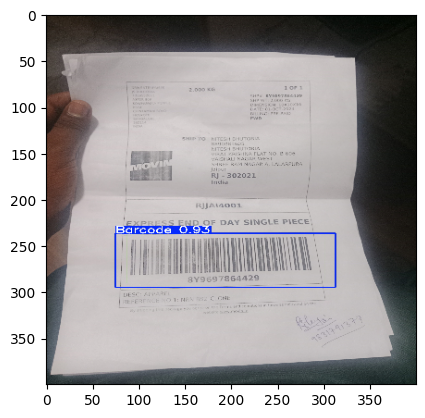

In [48]:
import cv2
import matplotlib.pyplot as plt

image_path = "download (1).png"  # Use your actual image path

# Load the image
image = cv2.imread(image_path)

# Check if the image is None
if image is None:
    print("Error: OpenCV couldn't read the image.")
else:
    print("Image shape:", image.shape)  # Check dimensions
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct colors
    plt.show()


In [49]:
for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box.tolist())
        print(f"Upper Left: ({x1}, {y1}), Upper Right: ({x2}, {y1}), Lower Left: ({x1}, {y2}), Lower Right: ({x2}, {y2})")


Upper Left: (222, 192), Upper Right: (484, 192), Lower Left: (222, 275), Lower Right: (484, 275)


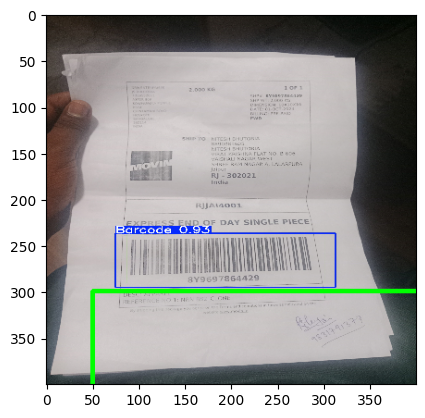

In [61]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "download (1).png"  # Update your image path
image = cv2.imread(image_path)

# Upper Left: (667, 2426), Upper Right: (2304, 2426), Lower Left: (667, 2969), Lower Right: (2304, 2969)
x1, y1, x2, y2 = 50, 2426, 2304, 299  # Your detected coordinates

# Draw bounding box
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Green box

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
